### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [50]:
import pandas as pd
import numpy as np

In [51]:
twitter_data = pd.read_csv("Twitter-Absolute-Sigma-500.data",sep
                             = ',', header = None)
twitter_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
           dtype='int64')

In [52]:
twitter_data.rename(index = str, columns = {0: 'NCD_0', 1: 'NCD_1', 2: 'NCD_2', 3: 'NCD_3', 4: 'NCD_4', 5: 'NCD_5', 6: 'NCD_6 ',
                              7: 'AI_0', 8: 'AI_1', 9:'AI_2', 10: 'AI_3', 11: 'AI_4', 12: 'AI_5', 13: 'AI_6', 14: 'AS(NA)_0',
                              15: 'AS(NA)_1', 16: 'AS(NA)_2', 17: 'AS(NA)_3', 18:'AS(NA)_4', 19: 'AS(NA)_5', 20: 'AS(NA)_6', 21: 'BL_0',
                              22: 'BL_1', 23: 'BL_2', 24: 'BL_3', 25: 'BL_4', 26: 'BL_5', 27: 'BL_6', 28: 'NAC_0', 29: 'NAC_1', 30: 'NAC_2',
                              31: 'NAC_3', 32: 'NAC_4', 33: 'NAC_5', 34: 'NAC_6', 35: 'AS(NAC)_0', 36: 'AS(NAC)_1', 37: 'AS(NAC)_2', 38: 'AS(NAC)_3',
                              39: 'AS(NAC)_4', 40: 'AS(NAC)_5', 41: 'AS(NAC)_6', 42: 'CS_0', 43:'CS_1', 44:'CS_2', 45:'CS_3', 46:'CS_4',47:'CS_5',48:'CS_6', 
                                            49:'AT_0',50:'AT_1',51:'AT_2',52:'AT_3',53:'AT_4',54:'AT_5',55:'AT_6',56:'NA_0',57:'NA_1',58:'NA_2',59:'NA_3',60:'NA_4',
                                            61:'NA_5',62:'NA_6',63:'ADL_0', 64:'ADL_1', 65:'ADL_2', 66:'ADL_3', 67:'ADL_4', 68:'ADL_5', 69:'ADL_6', 70:'NAD_0', 71:'NAD_1', 
                                            72:'NAD_2', 73:'NAD_3', 74:'NAD_4', 75:'NAD_5', 76:'NAD_6', 77: 'BUZZ'}, inplace = True)

In [ ]:
#twitter_data_sample = twitter_data.sample(frac=0.01, replace=True)

In [53]:
twitter_data.shape

(140707, 78)

In [54]:
#check whether data is balanced or unbalanced
twitter_data['BUZZ'].value_counts()

0.0    112932
1.0     27775
Name: BUZZ, dtype: int64

In [55]:
twitter_data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [56]:
#twitter_data_sample = twitter_data_sample[twitter_data_sample!=' ?'] #replace missing values with NaN
#twitter_data_sample = twitter_data_sample.dropna()    #drop all NaN values
twitter_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null float

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [58]:
X = twitter_data.iloc[ : ,:-1].values.astype(int)
y = twitter_data[['BUZZ']]
#setting data size to 10% of total
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)
#print(X.shape,y.shape)
X_train_unscaled , X_text_unscaled, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)

In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_text_unscaled)

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)
grid_knn.score(X_train, y_train)

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\srmis\appdata\local\programs\py

0.9854478953743661

In [61]:
grid_knn.score(X_test, y_test)

0.9595317725752508

In [62]:
grid_knn.best_params_

{'n_neighbors': 20}

In [63]:
grid_knn.cv_results_['mean_test_score']

array([0.88473127, 0.95417883, 0.96156003, 0.97019979, 0.97421132])

In [64]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [65]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.92
Test roc_auc_score: 0.87 


In [66]:
report_table = [['knn', grid_knn.best_params_, grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test) ]]

In [67]:
#Classification report for KNN
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       230
         1.0       0.81      0.73      0.77        52

   micro avg       0.92      0.92      0.92       282
   macro avg       0.87      0.85      0.86       282
weighted avg       0.92      0.92      0.92       282



In [68]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [69]:
grid_svc_lin.fit(X_train, y_train)

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [70]:
grid_svc_lin.best_params_

{'C': 1}

In [71]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train)
y_svc_lin_predict = grid_svc_lin.predict(X_test)

In [72]:
report_table = report_table + [['LinearSVC', grid_svc_lin.best_params_, grid_svc_lin.score(X_train, y_train), grid_svc_lin.score(X_test, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), roc_auc_score(y_svc_lin_predict, y_test)]]

In [73]:
report_table

[['knn',
  {'n_neighbors': 20},
  0.9854478953743661,
  0.9595317725752508,
  0.9170937831110301,
  0.8744680851063831],
 ['LinearSVC',
  {'C': 1},
  0.9929830040124158,
  0.9826923076923078,
  0.9602533051540348,
  0.9455696202531645]]

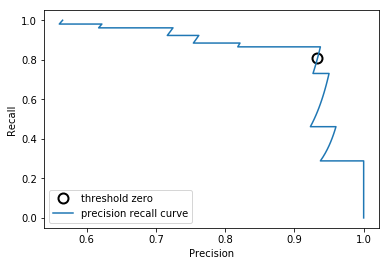

In [74]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, grid_svc_lin.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [75]:
#Classification report for LinearSVC
print(classification_report(y_test, y_svc_lin_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       230
         1.0       0.93      0.81      0.87        52

   micro avg       0.95      0.95      0.95       282
   macro avg       0.95      0.90      0.92       282
weighted avg       0.95      0.95      0.95       282



In [76]:
#report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])

In [77]:
#report.index = report['Model name']

In [78]:
#report

In [79]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,8,12,20]}
grid_dtree = GridSearchCV(tree, tree_para,cv=5,scoring = 'roc_auc')
grid_dtree.fit(X_train, y_train)
grid_dtree.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(grid_dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_dtree.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.975


In [80]:
grid_dtree.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [81]:
y_dtree_predict_train = grid_dtree.predict(X_train)
y_dtree_predict = grid_dtree.predict(X_test)

In [82]:
report_table = report_table + [['DecisionTree', grid_dtree.best_params_, grid_dtree.score(X_train, y_train), grid_dtree.score(X_test, y_test), roc_auc_score(y_dtree_predict_train, y_train), roc_auc_score(y_dtree_predict, y_test)]]

In [83]:
#Classification Report for Decision Tree 
print(classification_report(y_test, y_dtree_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       230
         1.0       0.90      0.90      0.90        52

   micro avg       0.96      0.96      0.96       282
   macro avg       0.94      0.94      0.94       282
weighted avg       0.96      0.96      0.96       282



In [84]:
#logistic regression
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state = 0)
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid_logReg = GridSearchCV(LogReg, grid_values, cv = 5, scoring ='roc_auc')
grid_logReg.fit(X_train, y_train)
grid_logReg.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(grid_logReg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_logReg.score(X_test, y_test)))

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Accuracy on training set: 0.993
Accuracy on test set: 0.982


c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
grid_logReg.best_params_

{'C': 1, 'penalty': 'l1'}

In [87]:
y_logreg_pred = grid_logReg.predict(X_test)
y_logreg_pred_train = grid_logReg.predict(X_train)

In [88]:
report_table = report_table + [['LogisticRegression', grid_logReg.best_params_, grid_logReg.score(X_train, y_train), grid_logReg.score(X_test, y_test), roc_auc_score(y_logreg_pred_train, y_train), roc_auc_score(y_logreg_pred, y_test)]]

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.

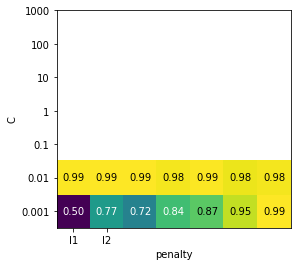

In [89]:
import pandas as pd
import mglearn
# convert to DataFrame
results = pd.DataFrame(grid_logReg.cv_results_)
# show the first 5 rows
#display(results.head())
%matplotlib inline
scores = np.array(results.mean_test_score).reshape(2, 7)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='penalty', xticklabels=grid_values['penalty'], ylabel='C', yticklabels=grid_values['C'], cmap="viridis")

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_logreg_pred)
confusion_matrix

array([[227,   3],
       [ 10,  42]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_logreg_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       230
         1.0       0.93      0.81      0.87        52

   micro avg       0.95      0.95      0.95       282
   macro avg       0.95      0.90      0.92       282
weighted avg       0.95      0.95      0.95       282



In [92]:
#SVM with Kernel
from sklearn.svm import SVC
import numpy as np
np.random.seed(0)
parameters = {'kernel': ('rbf','poly'), 'C':[0.01,0.1,1,10,100],'gamma': [0.01,0.1,1,10,100], 'degree' : [1,2]}
svc = SVC()
svc_withkernel = GridSearchCV(svc, parameters, cv = 5, scoring = 'roc_auc')
svc_withkernel.fit(X_train, y_train)
svc_withkernel.score(X_train, y_train)

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\srmis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversio

0.991213377242789

In [93]:
svc_withkernel_pred_train = svc_withkernel.predict(X_train)
svc_withkernel_pred_test = svc_withkernel.predict(X_test)

In [94]:
svc_withkernel.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 100, 'kernel': 'poly'}

In [95]:
print(classification_report(y_test, svc_withkernel_pred_test))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       230
         1.0       0.93      0.77      0.84        52

   micro avg       0.95      0.95      0.95       282
   macro avg       0.94      0.88      0.91       282
weighted avg       0.95      0.95      0.94       282



In [96]:
report_table = report_table + [['KernelizedSVM', svc_withkernel.best_params_, svc_withkernel.score(X_train, y_train), svc_withkernel.score(X_test, y_test), roc_auc_score(svc_withkernel_pred_train, y_train), roc_auc_score(svc_withkernel_pred_test, y_test)]]

In [97]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])

In [98]:
report.index = report['Model name']

In [99]:
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
knn,knn,{'n_neighbors': 20},0.985448,0.959532,0.917094,0.874468
LinearSVC,LinearSVC,{'C': 1},0.992983,0.982692,0.960253,0.945570
DecisionTree,DecisionTree,"{'criterion': 'entropy', 'max_depth': 4}",0.996939,0.975125,0.968050,0.941054
LogisticRegression,LogisticRegression,"{'C': 1, 'penalty': 'l1'}",0.993087,0.982023,0.957601,0.945570
KernelizedSVM,KernelizedSVM,"{'C': 0.01, 'degree': 1, 'gamma': 100, 'kernel...",0.991213,0.979431,0.957616,0.940012


Based on the Test Accuracy Score and Area Under Curve Score we have decided to run our whole data on Logistic Regression with parameters C =1 and Penalty l1

In [ ]:
LogReg = LogisticRegression(random_state = 0,'C': 1, 'penalty': 'l1')
X = twitter_data.iloc[ : ,:-1].values.astype(int)
y = twitter_data[['BUZZ']]

X_train_unscaled , X_text_unscaled, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_text_unscaled)

LogReg.fit(X_train, y_train)
LogReg.score(X_train, y_train)
y_predict_test = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predict_test)
confusion_matrix